Dimensões do dataset: (7043, 21)

Tipos de dados:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Primeiras linhas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Valores únicos por coluna:
customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2

Valores nulos por coluna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Espaços em branco por coluna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents    

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Descrição das variáveis categóricas:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


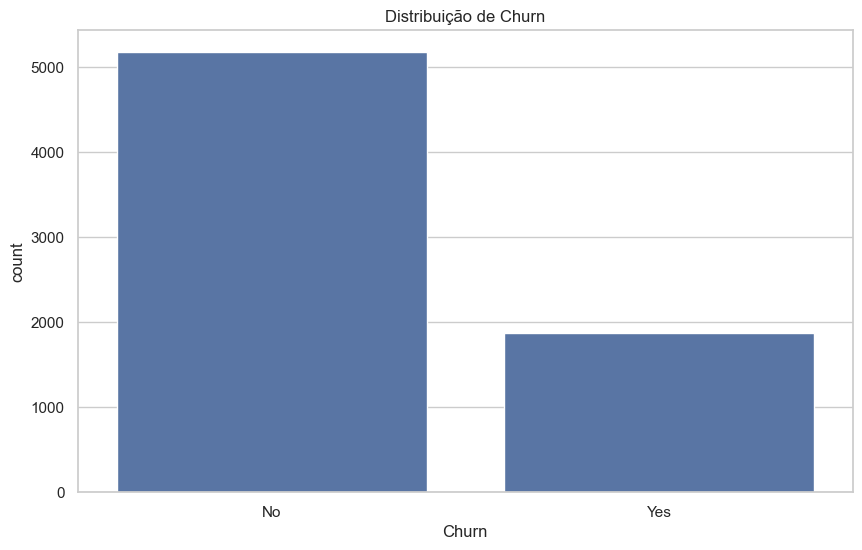

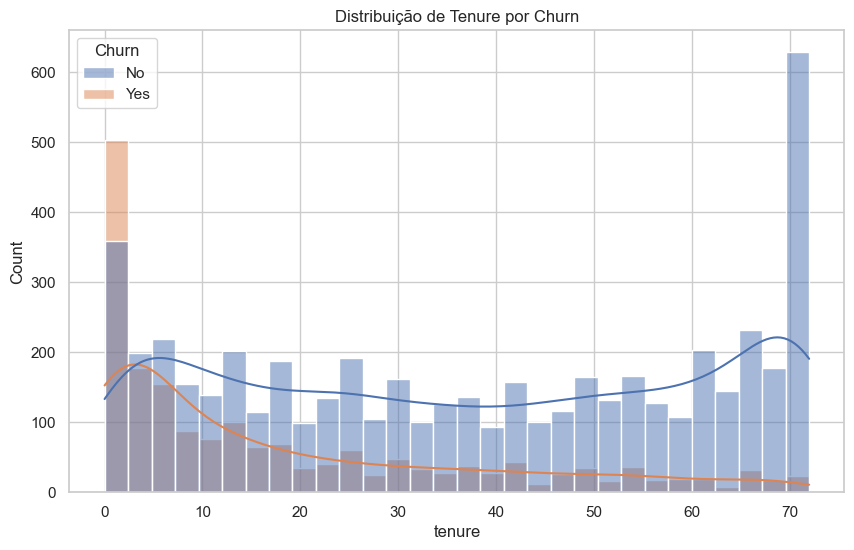

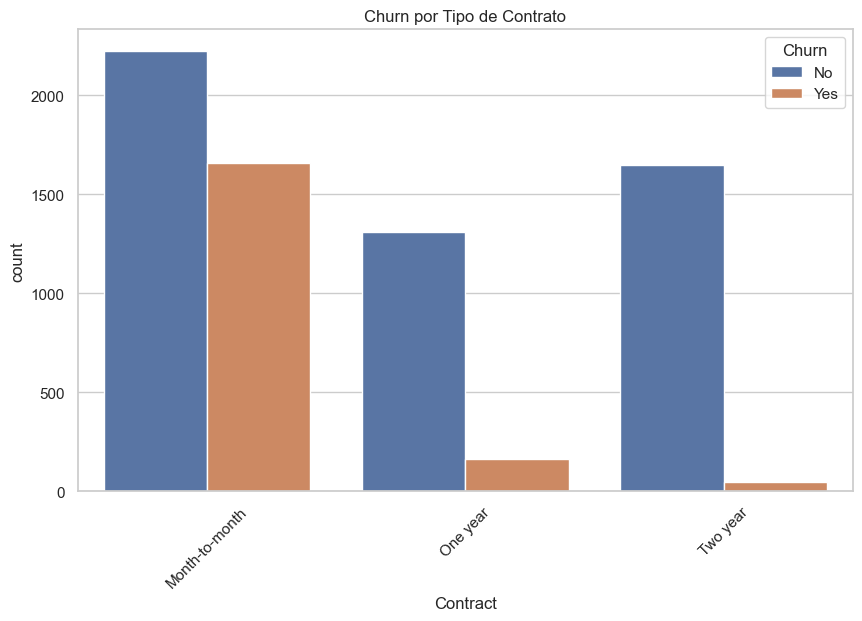

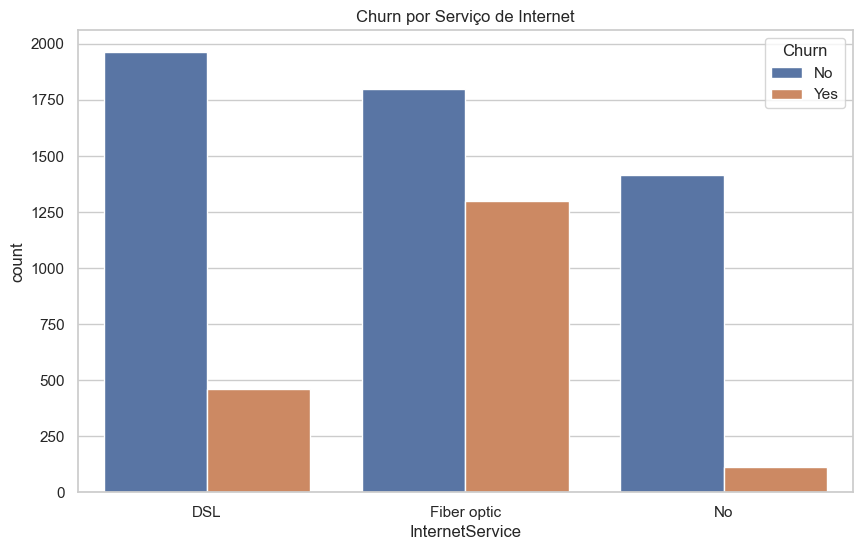

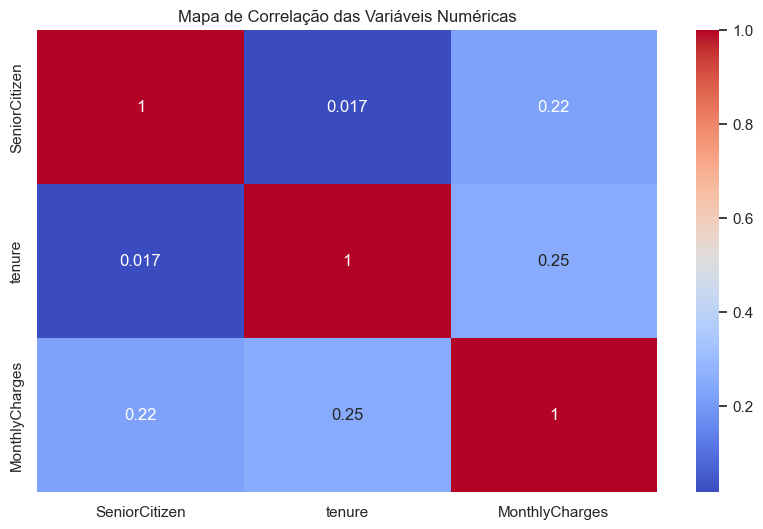

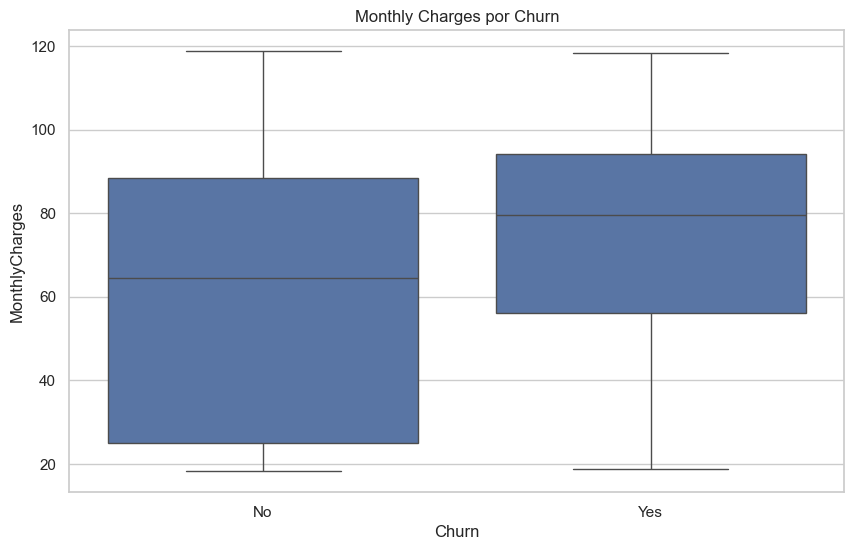

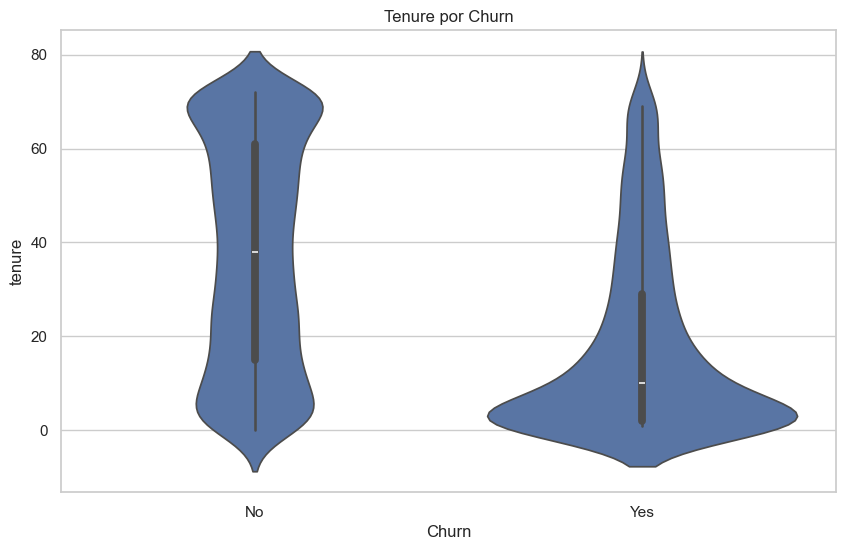

In [2]:
# 🔍 Exploratory Data Analysis (EDA) - Telco Customer Churn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carregar os dado
df = pd.read_csv('../src/data/telco_churn.csv')

# Visualização inicial
print("Dimensões do dataset:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nPrimeiras linhas:")
display(df.head())

# Valores únicos por coluna
print("\nValores únicos por coluna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Verificar espaços em branco (strings vazias)
print("\nEspaços em branco por coluna:")
print((df == ' ').sum())

# Estatísticas descritivas para variáveis numéricas
print("\nDescrição das variáveis numéricas:")
display(df.describe())

# Estatísticas descritivas para variáveis categóricas
print("\nDescrição das variáveis categóricas:")
display(df.describe(include='object'))

# Visualizações principais

# 1. Distribuição do Churn
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

# 2. Distribuição de tenure por Churn
plt.figure()
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Distribuição de Tenure por Churn')
plt.show()

# 3. Churn por tipo de contrato
plt.figure()
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

# 4. Churn por Internet Service
plt.figure()
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn por Serviço de Internet')
plt.show()

# 5. Correlação entre variáveis numéricas
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.show()

# 6. Boxplot de MonthlyCharges x Churn
plt.figure()
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges por Churn')
plt.show()

# 7. Violinplot de tenure x Churn
plt.figure()
sns.violinplot(data=df, x='Churn', y='tenure')
plt.title('Tenure por Churn')
plt.show()